In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('thai_housing_price_data_cleaned.csv', index_col = 0)

In [3]:
df

,areas,beds,baths,listing_date,prices,title_len,des_len,school,airport,city,...,แปลงยาว,แม่จัน,แม่ทะ,แม่ริม,แม่แตง,โคกสำโรง,โพธาราม,ไชยา,ไทรน้อย,ใหม่
0,50.0,3.0,3.0,2021-10-19,2490000,197,1788,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,82.0,3.0,4.0,2021-10-18,23900000,86,666,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40.0,3.0,2.0,2021-10-18,3990000,85,1594,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,100.0,4.0,3.0,2021-10-18,5500000,53,832,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50.0,3.0,2.0,2021-10-18,4200000,59,306,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,100.0,5.0,5.0,2021-09-13,9900000,34,782,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2396,100.0,5.0,3.0,2021-09-13,7500000,34,726,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2397,40.0,2.0,1.0,2021-09-23,1800000,75,164,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2398,NaN,3.0,3.0,2021-09-15,4600000,13,693,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import datetime as dt

In [5]:
# turn listing date from strings to float
df['listing_date'] = pd.to_datetime(df['listing_date'])

In [6]:
df['listing_date']

0      2021-10-19
1      2021-10-18
2      2021-10-18
3      2021-10-18
4      2021-10-18
          ...    
2395   2021-09-13
2396   2021-09-13
2397   2021-09-23
2398   2021-09-15
2399   2021-09-15
Name: listing_date, Length: 2400, dtype: datetime64[ns]

In [7]:
# Only 2.5% of the data is missing the bed and baths so we can drop those
df['beds'].isna().sum()/df.apply(len)

areas           0.025
beds            0.025
baths           0.025
listing_date    0.025
prices          0.025
                ...  
 โคกสำโรง       0.025
 โพธาราม        0.025
 ไชยา           0.025
 ไทรน้อย        0.025
ใหม่            0.025
Length: 256, dtype: float64

In [8]:
df.dropna(subset=['beds','baths'], inplace = True)

In [9]:
# 34% of the data has no areas
df['areas'].isna().sum()/df.apply(len)

areas           0.330189
beds            0.330189
baths           0.330189
listing_date    0.330189
prices          0.330189
                  ...   
 โคกสำโรง       0.330189
 โพธาราม        0.330189
 ไชยา           0.330189
 ไทรน้อย        0.330189
ใหม่            0.330189
Length: 256, dtype: float64

In [10]:
# deletes 15 and 21 bedrooms 
df = df[(df['beds'] != 15) &(df['beds'] != 21)]

In [11]:
df.groupby('beds').mean()

,areas,baths,prices,title_len,des_len,school,airport,city,association,university,...,แปลงยาว,แม่จัน,แม่ทะ,แม่ริม,แม่แตง,โคกสำโรง,โพธาราม,ไชยา,ไทรน้อย,ใหม่
beds,,,,,,,,,,,,,,,,,,,,,
1.0,30.700787,1.082707,1.132447e+06,12.714286,156.954887,0.037594,0.015038,0.022556,0.060150,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.007519,0.000000,0.000000,0.864662
2.0,67.578313,1.808696,3.365287e+06,70.339130,895.265217,0.260870,0.126087,0.234783,0.360870,0.000000,...,0.0,0.000000,0.004348,0.000000,0.000000,0.000000,0.004348,0.004348,0.000000,0.113043
3.0,68.358090,2.562176,6.300177e+06,76.425734,1074.943869,0.320380,0.164076,0.274611,0.490501,0.001727,...,0.0,0.000864,0.000000,0.002591,0.001727,0.000000,0.000864,0.000000,0.009499,0.093264
4.0,87.646377,3.464610,1.399004e+07,77.938294,1131.967332,0.312160,0.136116,0.272232,0.490018,0.000000,...,0.0,0.000000,0.000000,0.000000,0.001815,0.001815,0.000000,0.000000,0.003630,0.065336
5.0,123.068966,4.633721,2.637166e+07,79.674419,1175.244186,0.337209,0.145349,0.197674,0.331395,0.000000,...,0.0,0.000000,0.000000,0.011628,0.000000,0.000000,0.000000,0.000000,0.011628,0.093023
6.0,165.580645,5.622222,2.910200e+07,69.977778,1084.244444,0.244444,0.200000,0.177778,0.266667,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667
7.0,64.000000,5.416667,3.357833e+07,63.416667,1092.333333,0.250000,0.083333,0.083333,0.416667,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333
8.0,88.625000,7.461538,4.061154e+07,86.076923,1185.923077,0.153846,0.076923,0.153846,0.153846,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9.0,138.000000,8.333333,1.396667e+07,69.666667,1028.666667,0.666667,0.333333,1.000000,0.666667,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

areas                    766
beds                       0
baths                      0
listing_date               0
prices                     0
title_len                  0
des_len                    0
school                     0
airport                    0
city                       0
association                0
university                 0
view                       0
 กรุงเทพมหานคร             0
 กาญจนบุรี                 0
 กาฬสินธุ์                 0
 ขอนแก่น                   0
 จันทบุรี                  0
 ฉะเชิงเทรา                0
 ชลบุรี                    0
 ชัยภูมิ                   0
 ชุมพร                     0
 ตราด                      0
 นครนายก                   0
 นครปฐม                    0
 นครราชสีมา                0
 นครศรีธรรมราช             0
 นครสวรรค์                 0
 นนทบุรี                   0
 น่าน                      0
 บึงกาฬ                    0
 บุรีรัมย์                 0
 ปทุมธานี                  0
 ประจวบคีรีขันธ์           0
 ปราจีนบุรี   

In [13]:
bed_to_area = df.groupby('beds').mean()['areas']

In [14]:
# function to fill in the missing area
def fill_in_area(areas, beds):
    if np.isnan(areas):
        return bed_to_area[beds]
    else:
        return areas

In [15]:
df['areas'] = df.apply(lambda x: fill_in_area(x['areas'], x['beds']), axis=1)

<ipython-input-15-0b3b3df9a8cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['areas'] = df.apply(lambda x: fill_in_area(x['areas'], x['beds']), axis=1)


In [16]:
df['listing_date'] = df['listing_date'].map(dt.datetime.toordinal)

<ipython-input-16-e9883aa0a438>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['listing_date'] = df['listing_date'].map(dt.datetime.toordinal)


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y = df['prices']
X = df.drop('prices', axis = 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
#importing the library
from sklearn.linear_model import LinearRegression,Lasso

In [21]:
# starting with multiple linear regression as a based line
linear_model = LinearRegression()

In [22]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [23]:
predictions = linear_model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

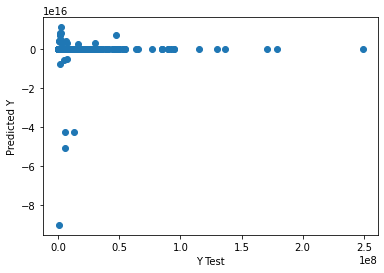

In [24]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [25]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 441239550501459.25
MSE: 1.9591575062771265e+31
RMSE: 4426237122293751.0


In [26]:
# so far the Linear Regression model is doing terrible at predicting the model

In [27]:
# lasso regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [28]:
# define model
lasso_model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(lasso_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 5934546.756 (520323.469)


In [29]:
lasso_model.fit(X_train, y_train)

C:\Users\tango\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.156196300594994e+16, tolerance: 39601381670939.61
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [30]:
lasso_predict = lasso_model.predict(X_test)

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(lasso_model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, verbose=2)

In [33]:
# perform the search
#results = search.fit(X, y)

In [34]:
# summarize
#print('MAE: %.3f' % results.best_score_)
#print('Config: %s' % results.best_params_)

In [35]:
# use alpha 0.99
# define model
lasso_model = Lasso(alpha=0.99)
lasso_model.fit(X_train,y_train)
lasso_predictions = lasso_model.predict(X_test)

C:\Users\tango\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.1561954346620056e+16, tolerance: 39601381670939.61
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'Predicted Y')

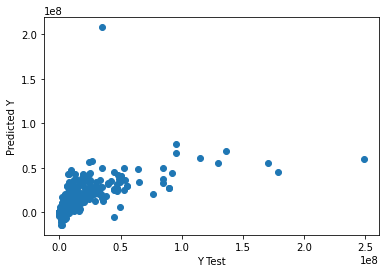

In [36]:
plt.scatter(y_test,lasso_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, lasso_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lasso_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_predictions)))

MAE: 6423036.022703767
MSE: 230729979691523.4
RMSE: 15189798.540188853


In [38]:
#The lasso model is doing way better than the linear regression

In [39]:
# random forest regression (because there are alot of valuables)
from sklearn.ensemble import RandomForestRegressor

In [40]:
rfc = RandomForestRegressor(n_estimators=600)

In [41]:
rfc.fit(X_train,y_train)

RandomForestRegressor(n_estimators=600)

In [42]:
rfc_predictions = rfc.predict(X_test)

Text(0, 0.5, 'Predicted Y')

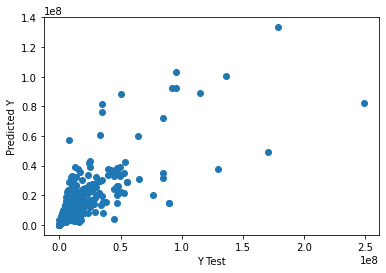

In [43]:
plt.scatter(y_test,rfc_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, rfc_predictions))
print('MSE:', metrics.mean_squared_error(y_test, rfc_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfc_predictions)))

MAE: 4428799.969195926
MSE: 145479681424822.1
RMSE: 12061495.820370791


In [45]:
#The rfc preformed the best

# Productization

In [46]:
# pickle the model (rfc)
import pickle

pickl = {'model': rfc}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [47]:
# build a Flask API
def load_models():
    file_name = "model_file.p"
    with open(file_name, 'rb') as pickled:
        data = pickle.load(pickled)
        model = data['model']
    return model

In [48]:
load_models().predict(X_test.iloc[1,:].values.reshape(1,-1))

array([5341812.5])

In [50]:
list(X_test.iloc[1,:])

[50.0,
 3.0,
 3.0,
 738081.0,
 41.0,
 1191.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
